In [1]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures

### Preconditionning std Laplacian with q=0.001

In [7]:
n = 100
p = 0.9
eta = 0.

rng = Random.default_rng()
meta_g = gen_graph_mun(rng, n, p, eta)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

B = magnetic_incidence(meta_g)
L = B * B'

q = 0.001
n_tot = 6
n_rep = 10
D_all = cond_numbers(meta_g,q,n_tot,n_rep,rng)

Dict{Any, Any} with 4 entries:
  "DPP unif" => Dict("sp_L"=>[371.3; 1794.4; … ; 3606.4; 3843.1], "sp_L_std"=>[…
  "iid LS"   => Dict("sp_L"=>[519.7; 1939.3; … ; 3609.0; 3836.3], "sp_L_std"=>[…
  "iid unif" => Dict("sp_L"=>[549.6; 1920.7; … ; 3432.6; 3827.3], "sp_L_std"=>[…
  "DPP LS"   => Dict("sp_L"=>[387.2; 1807.2; … ; 3588.0; 3860.0], "sp_L_std"=>[…

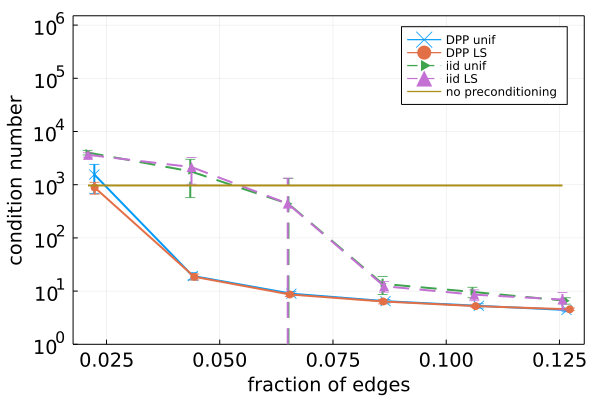

In [16]:
method = "DPP unif"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]

plot(x,y,
yerror=y_er,
xlabel = "fraction of edges",
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:xcross,
markersize = 5,
xtickfont=font(13), 
ytickfont=font(13), 
guidefont=font(13), 
legendfont=font(13),
linewidth=2,
markerstrokewidth=2)

method =  "DPP LS"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]

plot!(x,y,
yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:circle,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

method = "iid unif"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]

plot!(x,y,
yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:rtriangle,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)

method = "iid LS"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]

plot!(x,y,
yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:utriangle,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)

x = D["percent_edges"]
y = cond(L + q * I)*ones(n_tot,1)
plot!(x,y,
labels = "no preconditioning",
ylabel = "condition number",
xtickfontsize=13,
ytickfontsize=13,
xguidefontsize=13,
yguidefontsize=13,
legendfontsize=10,
linewidth=2,
framestyle = :box,
margins = 0.1*2Plots.cm,
markerstrokewidth=2)

ylims!((1e0,1.5*1e6))
yticks!([1,1e1,1e2,1e3,1e4,1e5,1e6])

# foldername = "figures/"
# type = "precond"
# name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)*".pdf"
# savefig(foldername*name)

### Preconditionning std Laplacian with q=0.1

In [11]:
n = 100
p = 0.9
eta = 0.

mm = Length(:mm, 1)

rng = Random.default_rng();
meta_g = gen_graph_mun(rng, n, p, eta);
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

q = 0.1
D_all = cond_numbers(meta_g,q,n_tot,n_rep,rng);


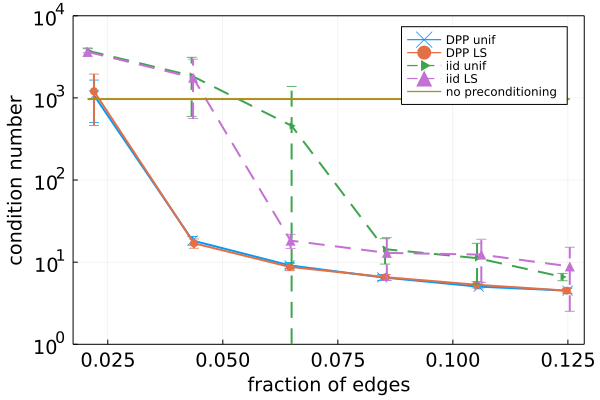

In [13]:

method = "DPP unif"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]


plot(x,y,yerror=y_er,
xlabel = "fraction of edges",
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:xcross,
markersize = 5,
linewidth=2,
markerstrokewidth=2)


method = "DPP LS"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]

plot!(x,y,yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:circle,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

method = "iid unif"
D = D_all[method]
x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]


plot!(x,y,yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:rtriangle,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)

method = "iid LS"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]


plot!(x,y,yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:utriangle,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)

x = D["percent_edges"]
y = cond(L + q * I)*ones(n_tot,1)
plot!(x,y,
labels = "no preconditioning",
ylabel = "condition number",
xtickfontsize=13,
ytickfontsize=13,
xguidefontsize=13,
yguidefontsize=13,
legendfontsize=10, 
framestyle = :box,
margins = 0.1*2Plots.cm,
linewidth=2,
markerstrokewidth=2)
ylims!((1e0,1e4))

# foldername = "figures/"
# type = "precond"
# name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)*".pdf"
# savefig(foldername*name)

## Same graph but with non-trivial bundle

In [14]:
q = 0.1;

n = 100
p = 0.9
eta = 0.1
meta_g = gen_graph_mun(rng, n, p, eta);

D_all = cond_numbers(meta_g,q,n_tot,n_rep,rng);

In [15]:
q = 0.001;

n = 100
p = 0.9
eta = 0.1
meta_g = gen_graph_mun(rng, n, p, eta);

D = cond_numbers(meta_g,q,n_tot,n_rep,rng);

### SBM

In [25]:
c = [50 10;
10 50]
n = [100 ; 100]
g =  stochastic_block_model(c, n)
meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

q = 0.001;
D = cond_numbers(meta_g,q,n_tot,n_rep,rng);